In [125]:
import numpy as np
from random import random
from random import randint
from math import *
import matplotlib.pyplot as plt


'Basic parameters'

I=200 #basic parameters
n=1000
dt=0.1
tau_m=5
g_L=10
'____________________________________________________________________'
class neuron :
    def __init__(self,n,time_to_model,neuron_of_first_layer): #n is the number of neurons it is connected to
        self.membpot=100.0   
        self.input_weights=[0]*n
        self.output_weights=[0]*n #the weights the neuron gives to the neurons of next layer
        self.output_weights_values=[0]*n
        self.activity=0
        self.V_th=-65
        self.V_reset= -75
        self.tau_m= 5
        self.g_L= 10
        self.V_init= -75
        self.E_L= -75
        self.Vlist=np.zeros(time_to_model)
        self.Xlist=np.zeros(time_to_model)
        self.Vlist[0]=self.V_init #List for potential values
        self.Xlist[0]=0   #List for timeline
        self.neuron_of_first_layer=neuron_of_first_layer
        self.activity_list=[]
  

    def update_LIF(self,t): 
        if self.neuron_of_first_layer:
            for j in range(len(self.input_weights)):
                 self.input_weights[j]=randint(-1,1)*random()
                    
        if t==0: #then we need to define the weights this neurons has with the next layer, indenpendent of t
            for i in range(len(self.output_weights)):
                self.output_weights_values[i]=randint(-1,1)*random()
            
        dV=(-(self.Vlist[t-1]-self.V_reset)+I/g_L)/tau_m
        if self.Vlist[t-1]>=self.V_th:
            self.Vlist[t]=self.V_init
#             print(f"Spiked at {t}")
        else:
            self.Vlist[t]=self.Vlist[t-1]+(dt*dV)
            
        S=0
        memb_pot=self.Vlist[t]
        for r in range(len(self.input_weights)):
            S+=memb_pot*self.input_weights[r]
        self.activity=S
        self.activity_list.append(self.activity)
        for m in range(len(self.output_weights)):
            self.output_weights[m]=self.output_weights_values[m]*self.activity
        
'_______________________________________________________________'
class layer :
    def __init__(self,n_neurons,time_to_model,first_layer):
        self.matrix=np.zeros((n_neurons,n_neurons)) #matrix of weights the layer inputs to the next one
        self.input_matrix=np.zeros((n_neurons,n_neurons))
        self.n_neurons=n_neurons
        self.Neurons_list=[]
        for i in range(self.n_neurons):
            neuron_of_first_layer=False
            if first_layer:
                neuron_of_first_layer=True
            N=neuron(self.n_neurons,time_to_model,neuron_of_first_layer)
            self.Neurons_list.append(N)
            
    def update(self,t):
        for i in range(len(self.Neurons_list)):
            N=self.Neurons_list[i]
            N.input_weights=self.input_matrix[i,:]
#             print('input weights of neuron',i,'here',N.input_weights)
            N.update_LIF(t)
            self.matrix[:,i]=N.output_weights
            self.matrix[i,i]=0

'_______________________________________________________________'
class network :
    def __init__(self,n_layers,n_neurons,time_to_model):
        self.n_layers=n_layers
        self.n_neurons=n_neurons
        self.time_to_model=time_to_model
        self.Layers_list=[]
        for k in range(self.n_layers):
            first_layer=False
            if k==0 :
                first_layer=True
            L=layer(self.n_neurons,time_to_model,first_layer)
            self.Layers_list.append(L)
    
    def update(self):
        for t in range(self.time_to_model):
            for k in range(len(self.Layers_list)):
                L=self.Layers_list[k]
                if k==0 : #first layer
                    L.update(t)
                else:
                    L.input_matrix=L_save.matrix #the input matrix is the output matrix of the previous one
                    L.update(t)
                L_save=L
#                 print('its layer',k,'matrix','of outputs. i.e. inputs for next layer')
#                 print(L_save.matrix)
   
    def plot_some(self,sel_layer):
        sel_layers=self.Layers_list[sel_layer]
        sel_neurons=sel_layers.Neurons_list
        for k in range(self.n_neurons):
            N=sel_neurons[k]
            N_activity=N.activity_list
            plt.plot(N_activity)
                

We make a matrix of weights to represent layers of neurons, and their weights. Each neuron is connected with all the others. One column of the matrix represents one layer of neurons :
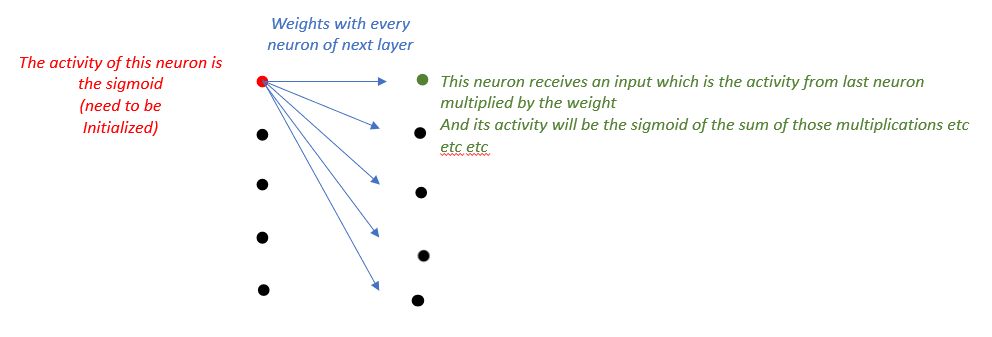

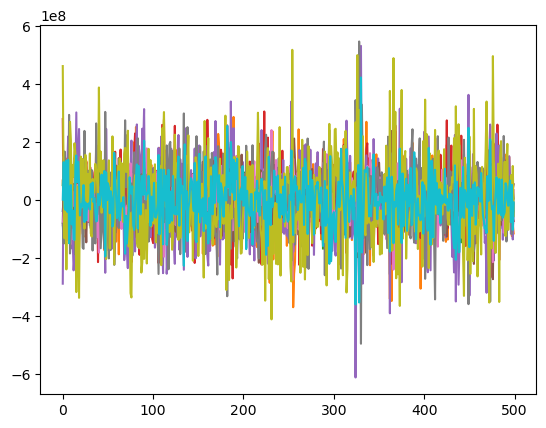

In [126]:
def main():
    time_to_model=500
    n_neurons=10
    n_layers=6
    my_network=network(n_layers,n_neurons,time_to_model)
    my_network.update()
    my_network.plot_some(3)
    
main()


The values of the membrane potential are huge but it comes from the fact input entries of any neurons are activities*weights so it can become huge.